# Part I - Loan Data Exploration
## by Teminijesu Ogunleye

## Introduction
> This dataset contains 113,937 loans with 81 variables on each loan, including loan amount, borrower rate(or interest rate), current loan status, borrower's income, and many others.

> The purpose of this analysis is to explore a sample of Prosper Loan data while trying to unravel some borrowers motivation when applying for loans and when there is a default, what are the likely indicators or features of defaulters.

> This analysis will attempt to answer the following questions:
> - What are the motivations for a borrower when applying for a loan?
> - Are there early warning indicators/signals for default?
> - What are the major and common features of defaulters and past due obligators?

> In attempting to answer the questions raised above, I would be paying keen attention to Borrwer's APR since it should be a reflection of the price for the loan, Prosper ratings since it would be a condition for granting the loan and the Loan outcome status. Variables of interest are better explained later in this report

## Preliminary Wrangling


In [2]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [3]:
#load the dataset into a pandas dataframe
prosper_loan = pd.read_csv(r'C:\Users\TEMINIJESU OGUNLEYE\Downloads\prosperLoanData.csv')

In [4]:
#Quick assessment of the data
prosper_loan.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [5]:
prosper_loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

## The Structure of the Dataset.

> This dataset contains 113,937 loans with 81 features (Including LoanOriginalAmount, Borrower APR, StatedMonthlyIncome, Term, ProsperRating (Alpha), EmploymentStatus and many others). There are lots of information that attempts to describe situations around each loan/borrower in the dataset.


## The main feature(s) of interest in the dataset

> There are loads of information in this dataset. However, the aim of this exploration is to try to understand the rationale behind borrowers motivation when applying for a loan and what factors if any affects a loan's outcome status. Our exploratory efforts will focus more on the following features/variables:

>- **ListingCategory (numeric):** The category of the listing that the borrower selected when posting their listing: 0 - Not Available, 1 - Debt Consolidation, 2 - Home Improvement, 3 - Business, 4 - Personal Loan, 5 - Student Use, 6 - Auto, 7- Other, 8 - Baby&Adoption, 9 - Boat, 10 - Cosmetic Procedure, 11 - Engagement Ring, 12 - Green Loans, 13 - Household Expenses, 14 - Large Purchases, 15 - Medical/Dental, 16 - Motorcycle, 17 - RV, 18 - Taxes, 19 - Vacation, 20 - Wedding Loans.

>- **isBorrowerHomeowner:** A Borrower will be classified as a homowner if they have a mortgage on their credit profile or provide documentation confirming they are a homeowner.

>- **IncomeVerifiable:** The borrower indicated they have the required documentation to support their income.

>- **DebtToIncomeRatio:** The debt to income ratio of the borrower at the time the credit profile was pulled. This value is Null if the debt to income ratio is not available. This value is capped at 10.01 (any debt to income ratio larger than 1000% will be returned as 1001%).

>- **StatedMonthlyIncome:** The monthly income the borrower stated at the time the listing was created.

>- **ProsperRating (Alpha):** The Prosper Rating assigned at the time the listing was created between AA - HR. Applicable for loans originated after July 2009.

>- **Term:** The length of the loan expressed in months.

>- **EmploymentStatus:** The employment status of the borrower at the time they posted the listing.

>- **LoanStatus:** The current status of the loan: Cancelled, Chargedoff, Completed, Current, Defaulted, FinalPaymentInProgress, PastDue. The PastDue status will be accompanied by a delinquency bucket.

>- **LoanOriginalAmount:** The origination amount of the loan.

>- **BorrowerAPR:** The Borrower's Annual Percentage Rate (APR) for the loan.


> Generally, I expect that the Prosper Rating might have a positive effect on the loan's outcome status: the better the prosper rating, the lower the chances of default and pastdue. I also think that the borrowers stated monthly income, loan term, borrower's APR, employment status will also have effects on the loan's outcome status. 


In [8]:
# Subset the dataframe by selecting only the main features/variables of interest in the dataset.
cols = ['ListingCategory (numeric)', 'IsBorrowerHomeowner', 'IncomeVerifiable', 'DebtToIncomeRatio', 'StatedMonthlyIncome', 'Term', 'ProsperRating (Alpha)',
                'EmploymentStatus', 'LoanStatus', 'LoanOriginalAmount', 'BorrowerAPR']
prosper_loan_sub = prosper_loan[cols]

In [9]:
prosper_loan_sub.head(10)

,ListingCategory (numeric),IsBorrowerHomeowner,IncomeVerifiable,DebtToIncomeRatio,StatedMonthlyIncome,Term,ProsperRating (Alpha),EmploymentStatus,LoanStatus,LoanOriginalAmount,BorrowerAPR
0,0,True,True,0.17,3083.333333,36,NaN,Self-employed,Completed,9425,0.16516
1,2,False,True,0.18,6125.000000,36,A,Employed,Current,10000,0.12016
2,0,False,True,0.06,2083.333333,36,NaN,Not available,Completed,3001,0.28269
3,16,True,True,0.15,2875.000000,36,A,Employed,Current,10000,0.12528
4,2,True,True,0.26,9583.333333,36,D,Employed,Current,15000,0.24614
5,1,True,True,0.36,8333.333333,60,B,Employed,Current,15000,0.15425
6,1,False,True,0.27,2083.333333,36,E,Employed,Current,3000,0.31032
7,2,False,True,0.24,3355.750000,36,C,Employed,Current,10000,0.23939
8,7,True,True,0.25,3333.333333,36,AA,Employed,Current,10000,0.07620
9,7,True,True,0.25,3333.333333,36,AA,Employed,Current,10000,0.07620


In [10]:
#descriptive statistices for numeric variables
prosper_loan_sub.describe()

,ListingCategory (numeric),DebtToIncomeRatio,StatedMonthlyIncome,Term,LoanOriginalAmount,BorrowerAPR
count,113937.000000,105383.000000,1.139370e+05,113937.000000,113937.00000,113912.000000
mean,2.774209,0.275947,5.608026e+03,40.830248,8337.01385,0.218828
std,3.996797,0.551759,7.478497e+03,10.436212,6245.80058,0.080364
min,0.000000,0.000000,0.000000e+00,12.000000,1000.00000,0.006530
25%,1.000000,0.140000,3.200333e+03,36.000000,4000.00000,0.156290
50%,1.000000,0.220000,4.666667e+03,36.000000,6500.00000,0.209760
75%,3.000000,0.320000,6.825000e+03,36.000000,12000.00000,0.283810
max,20.000000,10.010000,1.750003e+06,60.000000,35000.00000,0.512290


In [11]:
# check for duplicates
duplicates = prosper_loan_sub.duplicated().sum()
print ('There are {} duplicate records in the dataset'.format(duplicates))

There are 1165 duplicate records in the dataset


## Assessment Summary
> 1. There are 1165 duplicate records in the dataset.
> 2. **ListingCategory (numeric)** and **ProsperRating (Alpha)** can be reassigned with column names that are easier to work with.
> 3. The numeric information in **ListingCategory (numeric)** could be changed to string which better reflects the actual reasons for the loan. The data dictionary contains the necessary breakdown for this.
> 4. Key features like (**BorrowerAPR**, **DebtToIncomeRatio**  and **ProsperRating (Alpha)**) contains null values.
> 5. **ProsperRating** is an ordinal categorical variable and should be stored in ordered form.

## Data Cleaning

> The first step will be to create a copy of the original dataframe, then address the 5 identified issues using the define, code and test approach.

In [12]:
df = prosper_loan_sub
clean_df = df.copy()

In [13]:
# Drop the duplicate records in the dataframe
clean_df = clean_df.drop_duplicates()
duplicates = clean_df.duplicated().sum()
print ('There are {} duplicate records in the dataset'.format(duplicates))

There are 0 duplicate records in the dataset


In [14]:
# Reassign listingCategory (numeric) and ProsperRating (Alpha) by renaming the columns with proper names
clean_df = clean_df.rename(columns = {'ListingCategory (numeric)': 'ListingCategory', 'ProsperRating (Alpha)': 'ProsperRating'})

# verify code results
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 112772 entries, 0 to 113936
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ListingCategory      112772 non-null  int64  
 1   IsBorrowerHomeowner  112772 non-null  bool   
 2   IncomeVerifiable     112772 non-null  bool   
 3   DebtToIncomeRatio    104464 non-null  float64
 4   StatedMonthlyIncome  112772 non-null  float64
 5   Term                 112772 non-null  int64  
 6   ProsperRating        83698 non-null   object 
 7   EmploymentStatus     110517 non-null  object 
 8   LoanStatus           112772 non-null  object 
 9   LoanOriginalAmount   112772 non-null  int64  
 10  BorrowerAPR          112747 non-null  float64
dtypes: bool(2), float64(3), int64(3), object(3)
memory usage: 8.8+ MB


In [15]:
# Map the ListingCategory Column to the titles provided in the data dictionary
ListingCategory_titles = {0 : 'Not Available', 1 : 'Debt Consolidation', 2 : 'Home Improvement', 3: 'Business', 
                   4 : 'Personal Loan', 5 : 'Student Use', 6 : 'Auto', 7 : 'Other', 8 : 'Baby & Adoption', 
                   9 : 'Boat', 10 : 'Cosmetic Procedure', 11 : 'Engagement Ring', 12 : 'Green Loans',
                  13 : 'Household Expenses', 14 : 'Large Purchases', 15 : 'Medical or Dental', 16 : 'Motorcycle',
                  17 : 'RV', 18 : 'Taxes', 19 : 'Vacation', 20 : 'Wedding Loans'}
clean_df.ListingCategory = clean_df.ListingCategory.map(ListingCategory_titles)
clean_df.ListingCategory.unique()

array(['Not Available', 'Home Improvement', 'Motorcycle',
       'Debt Consolidation', 'Other', 'Household Expenses', 'Auto',
       'Medical or Dental', 'Wedding Loans', 'Vacation', 'Business',
       'Taxes', 'Baby & Adoption', 'Personal Loan', 'Engagement Ring',
       'Large Purchases', 'Student Use', 'Boat', 'RV',
       'Cosmetic Procedure', 'Green Loans'], dtype=object)

In [16]:
# Remove loans with missing borrowers APR and prosper rating information, Debt to Income ratio can be null if the borrower has no credit history on the platform.
clean_df = clean_df[~clean_df.BorrowerAPR.isna()]
clean_df = clean_df[~clean_df.ProsperRating.isna()]

In [17]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 83698 entries, 1 to 113936
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ListingCategory      83698 non-null  object 
 1   IsBorrowerHomeowner  83698 non-null  bool   
 2   IncomeVerifiable     83698 non-null  bool   
 3   DebtToIncomeRatio    76644 non-null  float64
 4   StatedMonthlyIncome  83698 non-null  float64
 5   Term                 83698 non-null  int64  
 6   ProsperRating        83698 non-null  object 
 7   EmploymentStatus     83698 non-null  object 
 8   LoanStatus           83698 non-null  object 
 9   LoanOriginalAmount   83698 non-null  int64  
 10  BorrowerAPR          83698 non-null  float64
dtypes: bool(2), float64(3), int64(2), object(4)
memory usage: 6.5+ MB


In [18]:
null_proportion = 1-(clean_df.shape[0] / df.shape[0])
print('The combined percentage of null records is ' + str(null_proportion * 100)[:4] + '%')

The combined percentage of null records is 26.5%


> Since the percentage of the null proportion is lesser than 30%, we can proceed with dropping the null records.

In [19]:
# Convert the ProsperRating into an ordered categorical type
rating_order = ['AA', 'A', 'B', 'C', 'D', 'E', 'HR']
ordered_rating = pd.api.types.CategoricalDtype(ordered = True,
                                    categories = rating_order)
clean_df['ProsperRating'] = clean_df['ProsperRating'].astype(ordered_rating)
clean_df['ProsperRating'].dtypes

CategoricalDtype(categories=['AA', 'A', 'B', 'C', 'D', 'E', 'HR'], ordered=True)

In [20]:
# Rename the cleaned dataframe and get the shape of our final dataframe
loan_df = clean_df
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 83698 entries, 1 to 113936
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   ListingCategory      83698 non-null  object  
 1   IsBorrowerHomeowner  83698 non-null  bool    
 2   IncomeVerifiable     83698 non-null  bool    
 3   DebtToIncomeRatio    76644 non-null  float64 
 4   StatedMonthlyIncome  83698 non-null  float64 
 5   Term                 83698 non-null  int64   
 6   ProsperRating        83698 non-null  category
 7   EmploymentStatus     83698 non-null  object  
 8   LoanStatus           83698 non-null  object  
 9   LoanOriginalAmount   83698 non-null  int64   
 10  BorrowerAPR          83698 non-null  float64 
dtypes: bool(2), category(1), float64(3), int64(2), object(3)
memory usage: 6.0+ MB


> The final dataframe is made up of **11 columns and 83,698 rows**. This is sufficient for the exploratory analysis in the next section

## Exploratory Data Analysis

> The data will be explored systematically by building univariate, bivariate and multivariate visualizations while using the Question-Visualization-Observations frame work throughout the exploration process. 

> To have an idea of how the numeric values are distributed, it is advisable to compute the descriptive statistics of the relevant numeric columns. This will be immensely helpful when configuring histogram bins during univariate explorations.

In [21]:
# Compute the descriptive statistices for the numeric columns
loan_df.describe()

,DebtToIncomeRatio,StatedMonthlyIncome,Term,LoanOriginalAmount,BorrowerAPR
count,76644.000000,8.369800e+04,83698.000000,83698.000000,83698.000000
mean,0.258657,5.937394e+03,42.472413,9064.544505,0.226798
std,0.319958,8.279447e+03,11.646818,6281.541169,0.079963
min,0.000000,0.000000e+00,12.000000,1000.000000,0.045830
25%,0.150000,3.452750e+03,36.000000,4000.000000,0.163610
50%,0.220000,5.000000e+03,36.000000,7500.000000,0.219450
75%,0.320000,7.083333e+03,60.000000,13500.000000,0.292540
max,10.010000,1.750003e+06,60.000000,35000.000000,0.423950


## Univariate Exploration

> I'll start by looking at the distribution of one of the variables of interest which is the borrower's APR (Annual Percentage Rate)

> **Question one: How are the borrower's APR values distributed in the dataset, do the majority of the loans have high or low APR values?**

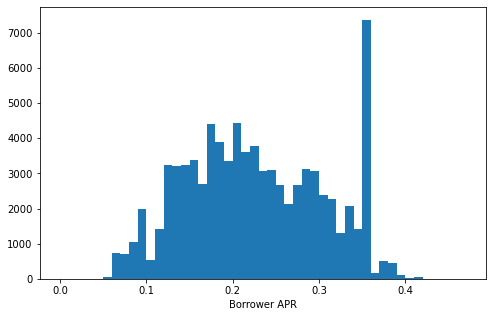

In [22]:
bins = np.arange(0, loan_df.BorrowerAPR.max()+0.05, 0.01)
plt.figure(figsize=[8, 5])
plt.hist(data = loan_df, x = 'BorrowerAPR', bins = bins);
plt.xlabel('Borrower APR');

> - The distribution of APR looks multimodal. A small peak centered at 0.1, a large peak centered at 0.2. There is also a small peak centered 0.3. Additionally, there is a very sharp shape between 0.35 and 0.36. Only a very few loans have APR greater than 0.4.

> Next, we will explore the debt to income ratio distribution for possible insights

> **Question Two: How are the values for the debt-to-income ratio distributed, are borrowers taking more debt than their income could handle?**

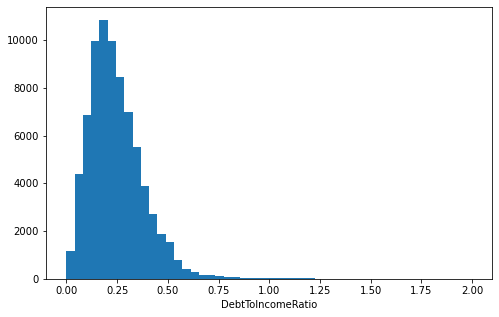

In [23]:
bins = np.linspace(0, 2, 50)
plt.figure(figsize=[8, 5])
plt.hist(data=loan_df, x='DebtToIncomeRatio', bins=bins)
plt.xlabel('DebtToIncomeRatio');

> - The distribution of the debt-to-income ratio is right skewed. It either means prosper has put in an effecttive measure to ensure investors are not investing in borrowers living above their means or most borrowers prefer to take loans within their means. The bulk of the values are distributed between 0 and 1.
> - Also, there seems to be a peak between 0.20 and o.25. It can be deduced that the debt-to-income ratio for prosper might be within that range of 20-25% which makes sense as it seems this ratio is even regulatory.

>Next will be to try and explore the **StatedMonthlyIncome** of the borrowers.

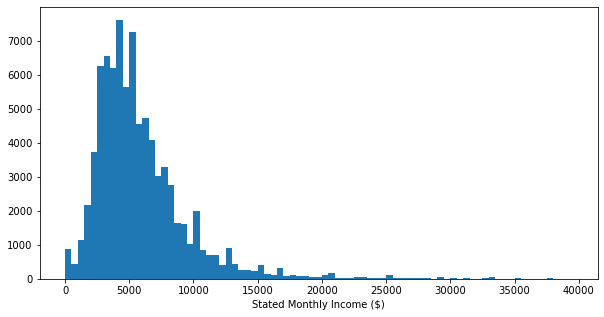

In [24]:
# Distribution of stated monthly income
bins_smi = np.arange(0, 40000, 500)
plt.figure(figsize=[10, 5])
plt.xlabel('Stated Monthly Income ($)')
plt.hist(data = loan_df, x = 'StatedMonthlyIncome', bins=bins_smi);

>The distribution of stated monthly income is seriously right screwed, with most of stated monthly income falling between the 0-30k US dollars monthly range and with a peak around 5k US dollars.


> - **Another point of interest would be to see the distribution of loan amounts requested by borrowers.**

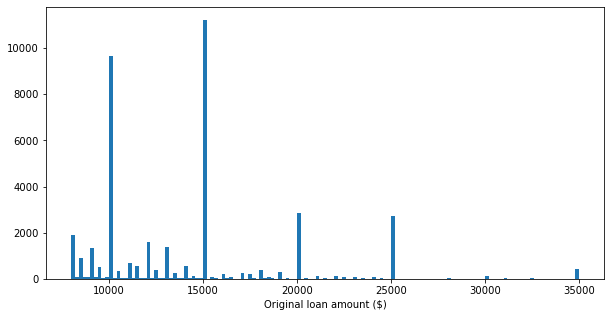

In [25]:
bins = np.arange(8000, loan_df.LoanOriginalAmount.max()+200, 200)
plt.figure(figsize=[10, 5])
plt.hist(data = loan_df, x = 'LoanOriginalAmount', bins = bins);
plt.xlabel('Original loan amount ($)');

> The very large spikes in frequency are at the 5k multiples. This may indicate that People prefer to borrow in multiples of 5k.
> There were also small spikes at 8k,9k,11k,12k,13k,14k etc meaning most of the loans are in multiples of 1k.

> **We would now be looking at our main and key variable which is the Loan Status.It would be nice to also have a look at the distributions of the tenor (term), employment status and Prosper rating**

> **Are people paying off their loans? Can we tell if there seems to be driving the status of these loans?**

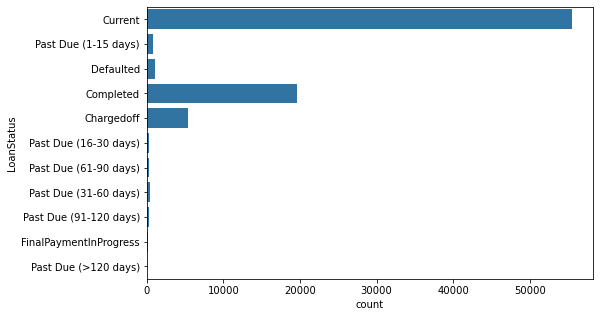

In [26]:
plt.figure(figsize=(8, 5))
default_color = sb.color_palette()[0]
sb.countplot(data=loan_df, y='LoanStatus', color = default_color);

> - The dataset is mostly comprised of current and completed loans (over 50,000 and 20,000 loan records) respectively. Charged off loans are about 5,000 records indicating losses for investors. I will be zooming in on the defaulting, charged off and past-due loans to see if there are features driving this kind of loan outcome status from borrowers.

### Distribution of Term, Prosper Ratings and Employment status in the dataset.

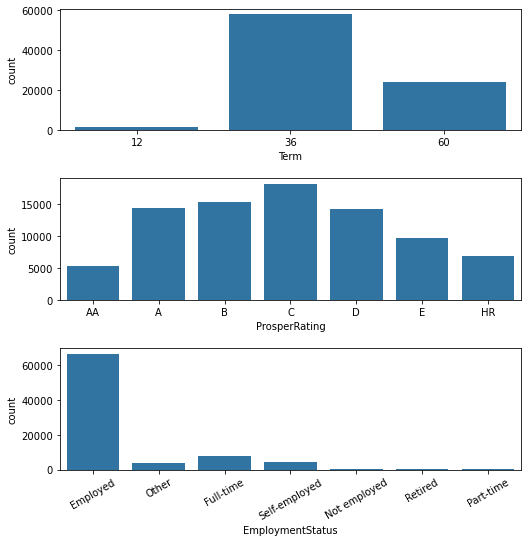

In [27]:
fig, ax = plt.subplots(nrows=3, figsize = [8,8])
default_color = sb.color_palette()[0]
sb.countplot(data = loan_df, x = 'Term', color = default_color, ax = ax[0])
sb.countplot(data = loan_df, x = 'ProsperRating', color = default_color, ax = ax[1])
sb.countplot(data = loan_df, x = 'EmploymentStatus', color = default_color, ax = ax[2]);
plt.xticks(rotation=30);
# adjust subplots to make it neater
plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.4,
                    hspace=0.4);

> The term distirbution suggests that prosper might only be providing three unique loan terms of 1(12 months), 3(36months) and 5(60months) years. Most of the loans were within the 36months bucket and might seem the most attractive to borrowers, while the least requested were the short-tenored loans of 1year  (12months).
> The distribution of prosper ratings is unimodal with over 50% of the borrowers falling within the A-D categories of the prosper ratings, while the most common rating belonged to the middle rating category represented by (**C**). Listings with the very high prosper ratings (**AA**) are the least common.
> Most of the borrowers are employed and full-time. This is intuitive and understandable considering how difficult it might be obtaining a loan without a job/stable sosurce of income.

### Distribution of an Income Verifiable source, the listing category and if the borrower is an home owner.

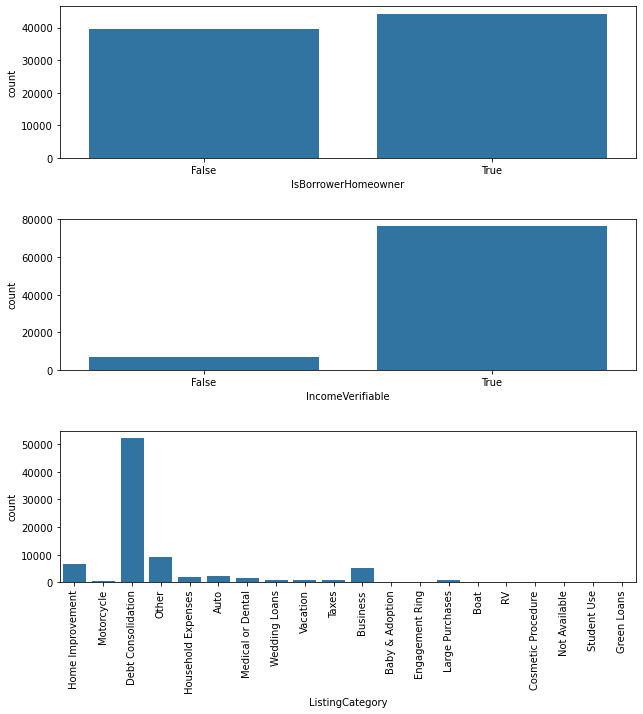

In [28]:
fig, ax = plt.subplots(nrows=3, figsize = [10,10])
default_color = sb.color_palette()[0]
sb.countplot(data = loan_df, x = 'IsBorrowerHomeowner', color = default_color, ax = ax[0])
sb.countplot(data = loan_df, x = 'IncomeVerifiable', color = default_color, ax = ax[1])
sb.countplot(data = loan_df, x = 'ListingCategory', color = default_color, ax = ax[2]);
plt.xticks(rotation=90);
# adjust subplots to make it neater
plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.4,
                    hspace=0.4);

> - Both Homeowners and non-homeowners seems to be fair users on the platform. However homeowners requesting loans on the platform are slightly more than their counterparts.
> - Most borrowers on the platform have a verifiable source of income which is unexpected considering the business model of the platform.
> - A point to note is that interestingly, most borrowers seems to use the platform to consolidate their debt (pay back existing loans) which might indicate and attractiveness of their offerings. The proportion of this category of individuals far outweighs those seeking loans for other predictable reasons like business, home Improvement, Medical etc.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> The distribution of borrowers APR looks multimodal. Most of the values are at a range of 0.05 and 0.4. There are no unusual points and no need to perform any transformations.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> The distributions of stated monthly income and debt-to-income ratio is highly right skewed. Most stated monthly incomes are less than 30k, but some of them are incredibly high, like greater than 100k. Surprisingly, most of those borrowers with greater than 100k monthly income only loan less than 5k dollars. So, the very large stated monthly income may be made up. The very large spikes in frequency are at the 5k multiples. This may indicate that People prefer to borrow in multiples of 5k.

>There is no need to perform any transformations.

## Bivariate Exploration

> In this section, I will be investigating the relationships between pairs of variables in this data. The variables covered here have been introduced in some fashion in the previous section (univariate exploration).

In [29]:
numerical_variables = ['LoanOriginalAmount', 'BorrowerAPR', 'StatedMonthlyIncome', 'DebtToIncomeRatio']
categorical_variables = ['Term', 'ProsperRating', 'EmploymentStatus', 'LoanStatus', 'ListingCategory','IncomeVerifiable', 'IsBorrowerHomeowner']

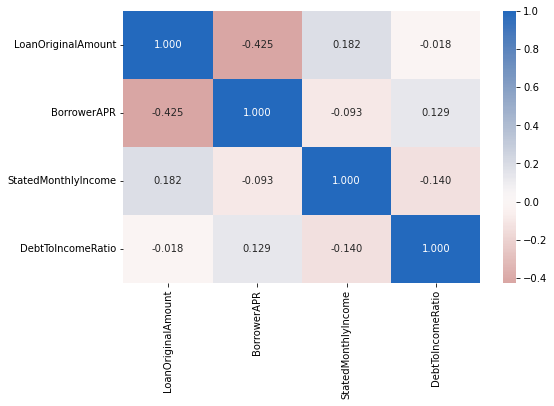

In [30]:
# correlation plot
plt.figure(figsize = [8, 5])
sb.heatmap(loan_df[numerical_variables].corr(), annot = True, fmt = '.3f', cmap = 'vlag_r', center = 0);

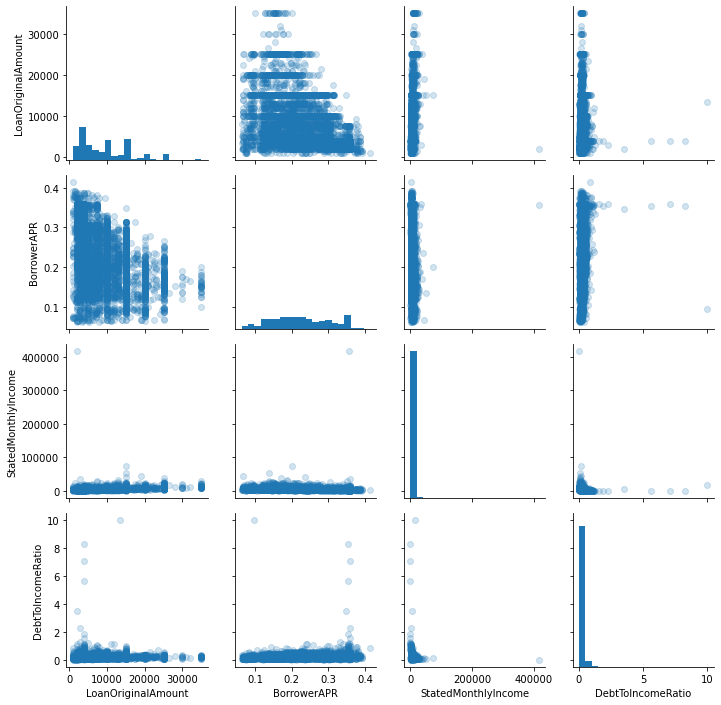

In [31]:
# plot matrix: sample 5000 loans so that plots are clearer and render faster
loan_df_samp = loan_df.sample(5000)
g = sb.PairGrid(data = loan_df_samp.dropna(), vars = numerical_variables)
g = g.map_diag(plt.hist, bins=20)
g.map_offdiag(plt.scatter, alpha=0.2);

> - The correlation coefficient of borrower APR and loan original amount is -0.425, the scatter plot also shows that these two variables are negatively correlated which implies that larger loans may attract lesster Annual percentage return (APR) than smaller oners.  
> - The loan original amount is also moderately slightly correlated with the stated monthly income (0.182), intuitively stated monthly income is slightly negatively correlated with borrower's APR. 
> - There is also a slightly positive relationship(0.129) between the borrower's APR and the debt-to-income ratio it makes sense since borrowers with more monthly income could loan more money.
> - There is also a slightly negative correlation of -0.140 between stated monthly income and debt to income ratio. This means that the higher your monthly income, the lower your debt to income ratio. This might happen because before you take on more debt, your income most likely would have increased first. That time lag might have caused the slight negative correlation.
> Let's move on to looking at how borrower's APR, stated monthly income and loan original amount correlate with the categorical variables.

<Figure size 720x720 with 0 Axes>

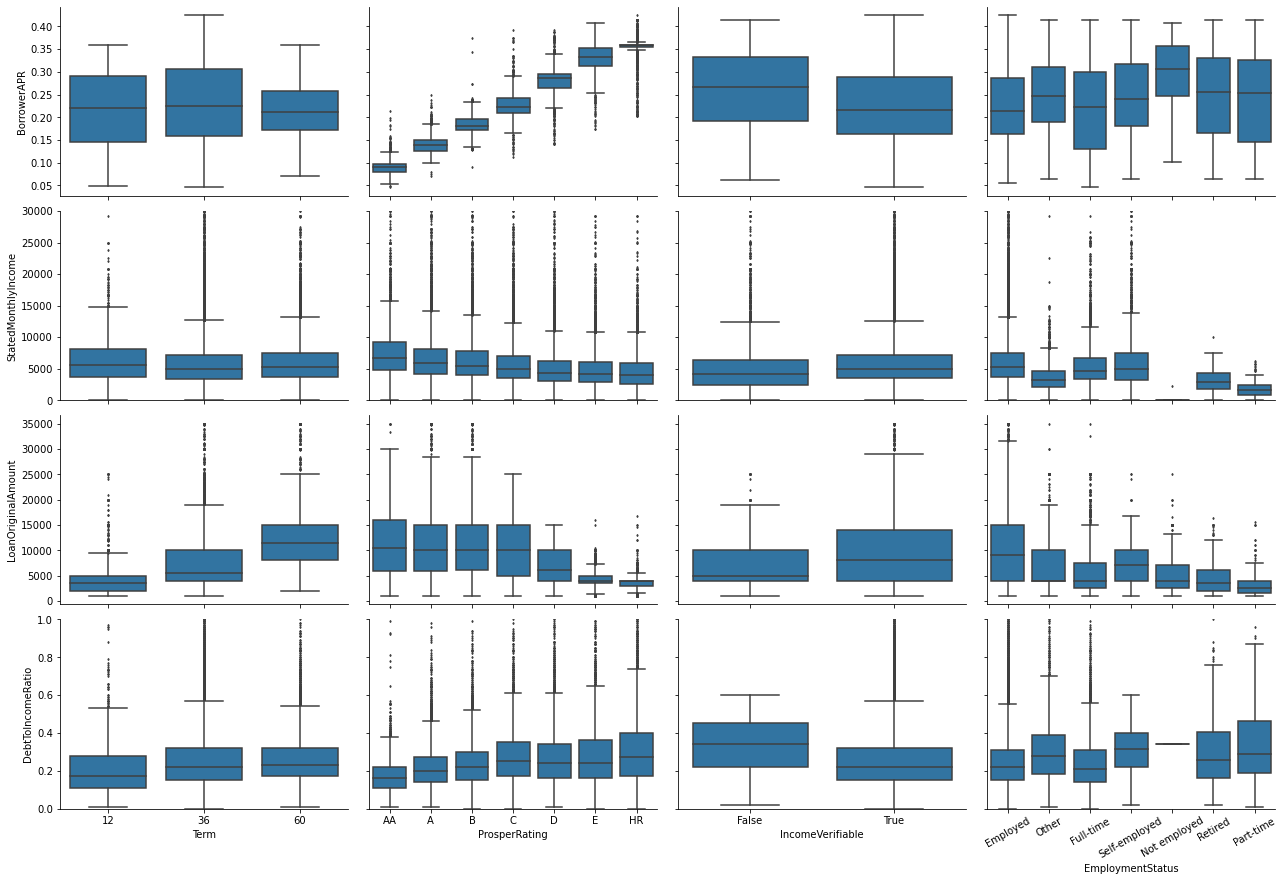

In [71]:
# plot matrix of numeric features against categorical features.

def boxgrid(x , y, **kwargs):
    """ Quick hack for creating box plots with seaborn's PairGrid. """
    y_cols = ['BorrowerAPR', 'StatedMonthlyIncome', 'LoanOriginalAmount','DebtToIncomeRatio']
    x_cols = ['Term','ProsperRating', 'IncomeVerifiable', 'EmploymentStatus']
    default_color = sb.color_palette()[0]
    return sb.boxplot(x=x, y=y, color = default_color, fliersize=1.5)
    
plt.figure(figsize = [10, 10])
fig = sb.PairGrid(data = loan_df, x_vars = x_cols, y_vars = y_cols , height = 3, aspect = 1.5)
fig.map(boxgrid);

# Limit the y axis of stated monthly income to 0 - 30000
for ax in fig.axes[1, :]:
    ax.set_ylim(0, 30000)

# Limit the y axis of debt income ratio to 0 - 1
for ax in fig.axes[3, :]:
    ax.set_ylim(0, 1)
    
plt.xticks(rotation=30);

> - There is a negative/inverse relationship between the Borrower's APR and the prosper ratings. We can also infer that borrowers with higher ratings enjoy lower interest rates on the platform. 
> - There is a positive correlation between between the Loan term and the Loan Original Amount. The higher the tenor(term), the higher the loan original amount requested on the platform. This is intuitive as longer terms means you can now have access to an higher amount. Also, borrowers with higher prosper ratings seems to enjoy larger loans. This might speak to the risk methodology of prosper loans or the risk appetite of the investors.
> - Borrowers with a verifiable source of income have a lower debt to income ratio. Interestingly, their stated monthly income did not really differ,however borrowers with non-verifiable source of income had lower loan original amount with higher borrower's APR. 
> - Borrowers who are employed had the lowest Debt to income ratio while those part time jobs had the highest debt to income ratio. Those employed also had the highest Loan Original Amount with the lowest Borrowers APR while those on part-time jobs had the lowest Loan original amount and stated monthly income. 
> - There is a positive relationship between stated monthly income and prosper ratings. Borrowers with higher stated monthly income had higher ratings. This might indicate that Stated monthly income could be one of the factors considered in determining the prosper ratings.


> Finally, let's look at relationships between some of the categorical features and the Loan Status

In [72]:
# Drop the current and completed loans and final payment in progress to enable focus on the behaviour of the other categories

Loan_Status1 = loan_df.drop(loan_df[loan_df.LoanStatus == "Current"].index)
Loan_Status2 = Loan_Status1.drop(Loan_Status1[Loan_Status1.LoanStatus == "Completed"].index)
Loan_Status = Loan_Status2.drop(Loan_Status2[Loan_Status2.LoanStatus == "FinalPaymentInProgress"].index)
Loan_Status.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8378 entries, 12 to 113905
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   ListingCategory      8378 non-null   object  
 1   IsBorrowerHomeowner  8378 non-null   bool    
 2   IncomeVerifiable     8378 non-null   bool    
 3   DebtToIncomeRatio    7174 non-null   float64 
 4   StatedMonthlyIncome  8378 non-null   float64 
 5   Term                 8378 non-null   int64   
 6   ProsperRating        8378 non-null   category
 7   EmploymentStatus     8378 non-null   object  
 8   LoanStatus           8378 non-null   object  
 9   LoanOriginalAmount   8378 non-null   int64   
 10  BorrowerAPR          8378 non-null   float64 
dtypes: bool(2), category(1), float64(3), int64(2), object(3)
memory usage: 614.0+ KB


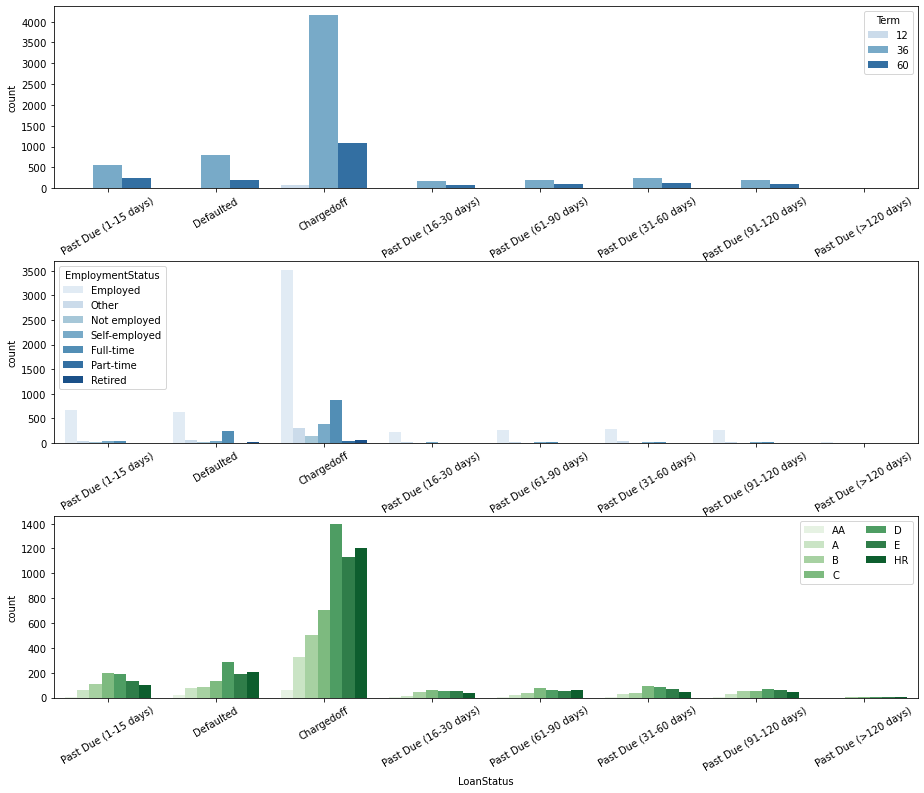

In [73]:
plt.figure(figsize = [15, 12])

# subplot 1: Loan Status vs term
plt.subplot(3, 1, 1)
sb.countplot(data = Loan_Status, x = 'LoanStatus', hue = 'Term', palette = 'Blues')
plt.xticks(rotation=30)

# subplot 2: Employment status vs. Loan Status
ax = plt.subplot(3, 1, 2)
sb.countplot(data = Loan_Status, hue = 'EmploymentStatus', x = 'LoanStatus', palette = 'Blues')
plt.xticks(rotation=30)

# subplot 3: Prosper rating vs. Loan Status, use different color palette
ax = plt.subplot(3, 1, 3)
sb.countplot(data = Loan_Status, x = 'LoanStatus', hue = 'ProsperRating', palette = 'Greens')
ax.legend(loc = 1, ncol = 2); # re-arrange legend to remove overlapping
plt.xticks(rotation=30);

# adjust subplots to make it neater
plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.4,
                    hspace=0.4);

> - Most borrowers who had defaulted or are defaulting are those who took the longer term loans of 3 and 5years. The highest defaults also seems to be happening at the 3years(36months) listings product. Although, the 36months loan term listing had the highest number of borrowers which might have contributed to the high default.
> - Interestingly, most of the borrowers who defaulted or are defaulting are employed. It would have been nice to see the Industry of employment and possibly see if it can be narrowed to industries. Although, it most be noted that about 60% of their borrowers are employed, this might just be the associated cost of playing in that market.
> - The AA rated borrowers had the lowest level of default which might be an indication of the relaibility of the prosper rating methodology.

> With the preliminary look at bivariate relationships out of the way, It will be interesting to see how borrower's APR and Loan Original Amount are related to one another for all of the data.

<AxesSubplot:xlabel='LoanOriginalAmount', ylabel='BorrowerAPR'>

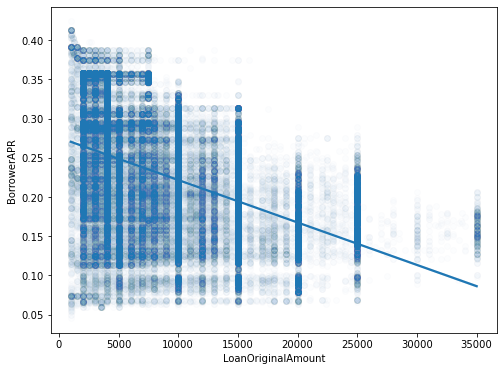

In [74]:
plt.figure(figsize = [8, 6])
sb.regplot(data = loan_df, y = 'BorrowerAPR', x = 'LoanOriginalAmount', scatter_kws={'alpha':0.01})

> This plot shows that at different size of the loan original amount, the APR has a large range, but the range of APR decreases with an increase in the loan original amount.  

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> The borrower's APR is negatively correlated with the loan original amount and the prosper ratings, which means the more the loan amount, the lower the APR.

> Prosper Rating showed inverse relationship with the debt-to-income ratio.
### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> The loan original amount is positively correlated with the stated monthly income, it makes sense since borrowers with more monthly income could loan more money. 

> It also shows that borrowers with better ratings also have larger monthly income and loan amount. It also seems that only 36 months tenored loans are available for HR rating borrowers.

> Most borrowers who had defaulted or are defaulting are those who took the longer term loans of 3 and 5years. The highest defaults also seems to be happening at the 3years(36months) listings

> Most borrowers who had defaulted or are defaulting are employed.

## Multivariate Exploration

> The focal point of interest I will be exploring here is how the categorical variable (term and home ownership) play into the relationship between Loan Original amount and prosper rating

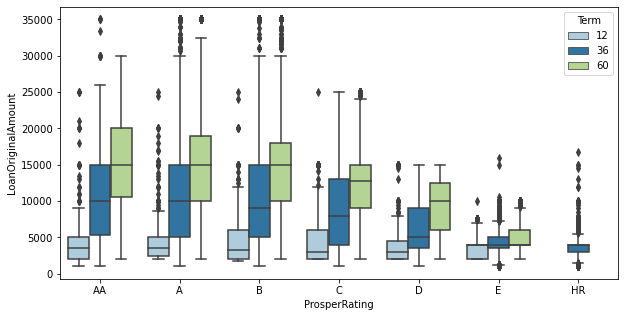

In [75]:
# What is the relationship between the Loan term(tenor), the Loan original amount and Prosper Rating
plt.figure(figsize=(10,5))
sb.boxplot(data=loan_df, x='ProsperRating', y='LoanOriginalAmount', hue='Term', palette = 'Paired');

> Across all prosper ratings, the longer term loans obtained higher loan amounts than the short-term loan of 12months. It also seems the longer the term, the higher the amount. This is expected considering that longer terms means higher number of repayments which increases the ability to access higher loans.

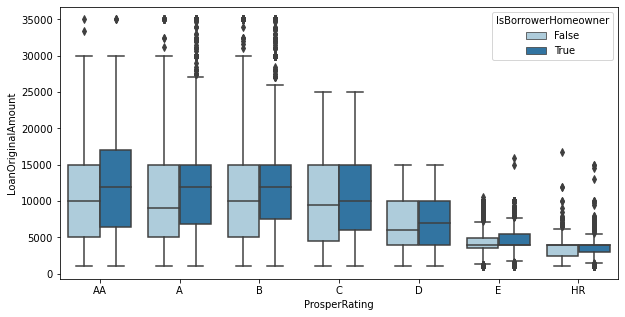

In [76]:
# What is the relationship between home ownership status, the Loan original amount and Prosper Rating
plt.figure(figsize=(10,5))
sb.boxplot(data=loan_df, x='ProsperRating', y='LoanOriginalAmount', hue='IsBorrowerHomeowner', palette = 'Paired');

> Across all prosper ratings, homeowners were able to access higher loan amounts than those without homes. It also seems to elucidate the fact that owning a home might be a good consideration especially when higher loan amounts are involved.

> Let us look at the effect of the prosper ratings and term on a borrower's APR

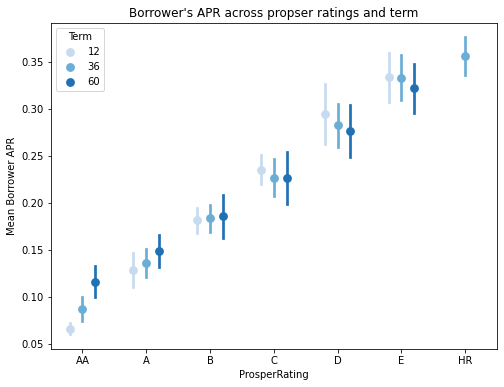

In [77]:
#Borrower's APR across Prosper Ratings and Term.
fig = plt.figure(figsize = [8,6])
ax = sb.pointplot(data = loan_df, x = 'ProsperRating', y = 'BorrowerAPR', hue = 'Term',
           palette = 'Blues', linestyles = '', dodge = 0.4, ci='sd')
plt.title("Borrower's APR across propser ratings and term")
plt.ylabel('Mean Borrower APR')
ax.set_yticklabels([],minor = True);

> From the plot. We can Summarize that, the higher the term, the lower the APR for borrowers with lower ratings from HR - C while the higher the term, the higher the borrower's APR for borrowers with higher ratings of B-AA.

> Then, let's look at the ratings and term effects on Debt to income ratio and loan original amount variables

<AxesSubplot:xlabel='ProsperRating', ylabel='LoanOriginalAmount'>

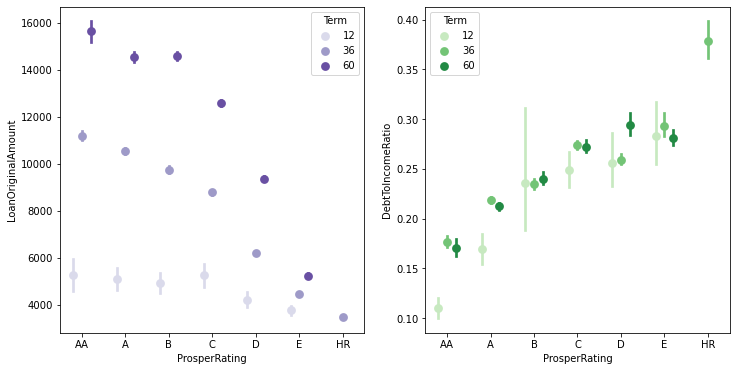

In [78]:
fig, ax = plt.subplots(ncols=2, figsize=[12,6])
sb.pointplot(data = loan_df, x = 'ProsperRating', y = 'DebtToIncomeRatio', hue = 'Term',
           palette = 'Greens', linestyles = '', dodge = 0.4, ax=ax[1]);
sb.pointplot(data = loan_df, x = 'ProsperRating', y = 'LoanOriginalAmount', hue = 'Term',
           palette = 'Purples', linestyles = '', dodge = 0.4, ax=ax[0])

> As shown from the first plot, Borrowers with high prosper ratings, due to their higher stated monthly income, tend to take higher loan amount on the platform, especially when the term is longer. This behaviour seems to lead to a notable increase in Debt-to-income ratio among the highest rated individuals (AA and A). This shows when you compare the vertical distance between the 12-month and 36-month term loans, across each prosper rating group on the second plot.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> I beamed my investigation searchlight on Prosper ratings against loan amount by looking at the impact of the Loan Term(Tenor) and homeownership. The multivariate exploration showed that the longer term loans obtained higher loan amounts than the short-term loan of 12months. It also seems the longer the term, the higher the amount. Also, homeowners were able to access higher loan amounts than those without homes. It also seems to elucidate the fact that owning a home might be a good consideration especially when higher loan amounts are involved.

### Were there any interesting or surprising interactions between features?

> An interesting interaction was that the borrower's APR and loan original amount was negatively correlated when the Prosper ratings are lower from HR to B, but the correlation turns positive when the ratings are higher between A and AA.

> Also, it was suprising to see that the higher the term, the lower the APR for borrowers with lower ratings from HR - C while the higher the term, the higher the borrower's APR for borrowers with higher ratings of B-AA.


## Conclusions
> - There is a negative correlation between the borrower's APR and the loan original amount, loan term and prosper rating. This implies that the more or an Increase in the loan amount, loan term or the prosper ratings the lower the borrower's APR. The prosper ratings seems to be influenced by the borrower's home ownership status, debt to income ratio and employment status.

> - Borrowers were taking loans for debt consolidation rather than use the loans to start business or purchase an asset. People also seems to depend on huge loans to finance weddings, child adoptions and some other luxuries. 

> - Between the lower ratings of HR to B, borrower APR and prosper ratings were negatively correlated. This interaction turns positive within the high prosper rating group (B to AA). This we attributed to the possible influence of lurking variables, such as the loan term, and stated monthly income who are usually rated higher on the prosper scale. Higher stated monthly income earners seemed to borrow more when long-term loans are involved, increasing their debt to income ratio. Hence, increasing the APR might be a great way to disincentivize 'overborrowing'. 
On the other hand, decreasing APR might be a great way to encourage borrowers with lower stated monthly income to take long-term loans — those that they would be able to fully repay.